In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

In [2]:
data = pd.read_csv("../datasets/high_diamond_ranked_10min.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [4]:
data = data.drop(columns=['gameId', 'redGoldPerMin', 'redKills', 'redDeaths','blueGoldPerMin',
                          'blueCSPerMin','redCSPerMin', 'redFirstBlood','redGoldDiff','blueTotalExperience',
                         'redExperienceDiff', 'blueTotalGold', 'redTotalGold', 'redTotalExperience'])

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueAvgLevel                  9879 non-null   float64
 12  blueTotalMinionsKilled        9879 non-null   int64  
 13  blu

In [5]:
# reduce column by create differcence between each columns
data['blueWardsPlacedDiff'] = data['blueWardsPlaced'] - data['redWardsPlaced'] 
data['blueWardsDestroyedDiff'] = data['blueWardsDestroyed'] - data['redWardsDestroyed']
data['blueAvgLevelDiff'] = data['blueAvgLevel'] - data['redAvgLevel'] 
data['blueAssistsDiff'] = data['blueAssists'] - data['redAssists'] 
data['blueTotalMinionsKilledDiff'] = data['blueTotalMinionsKilled'] - data['redTotalMinionsKilled']
data['blueTotalJungleMinionsKilledDiff'] = data['blueTotalJungleMinionsKilled'] - data['redTotalJungleMinionsKilled'] 
data['blueEliteMonstersDiff'] = data['blueEliteMonsters'] - data['redEliteMonsters']
data['blueDragonsDiff'] = data['blueDragons'] - data['redDragons'] 
data['blueHeraldsDiff'] = data['blueHeralds'] = data['redHeralds'] 
data['blueTowersDestroyedDiff'] = data['blueTowersDestroyed'] - data['redTowersDestroyed']

In [6]:
data = data.drop(columns= ['blueWardsPlaced','redWardsPlaced','blueWardsDestroyed', 'redWardsDestroyed',
'blueAvgLevel', 'redAvgLevel','blueAssists','redAssists', 'blueTotalMinionsKilled','redTotalMinionsKilled',
'blueTotalJungleMinionsKilled','redTotalJungleMinionsKilled',
'blueEliteMonsters', 'redEliteMonsters','redDragons', 'blueDragons', 'blueHeralds', 
                            'redHeralds','blueTowersDestroyed','redTowersDestroyed']) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blueWins                          9879 non-null   int64  
 1   blueFirstBlood                    9879 non-null   int64  
 2   blueKills                         9879 non-null   int64  
 3   blueDeaths                        9879 non-null   int64  
 4   blueGoldDiff                      9879 non-null   int64  
 5   blueExperienceDiff                9879 non-null   int64  
 6   blueWardsPlacedDiff               9879 non-null   int64  
 7   blueWardsDestroyedDiff            9879 non-null   int64  
 8   blueAvgLevelDiff                  9879 non-null   float64
 9   blueAssistsDiff                   9879 non-null   int64  
 10  blueTotalMinionsKilledDiff        9879 non-null   int64  
 11  blueTotalJungleMinionsKilledDiff  9879 non-null   int64  
 12  blueEl

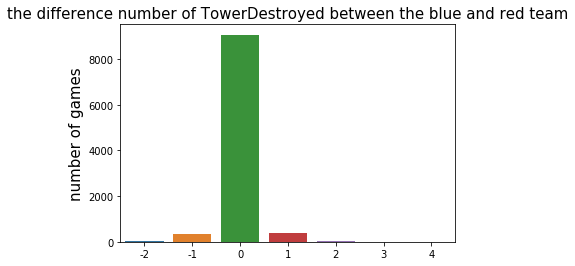

In [7]:
sns.countplot(data['blueTowersDestroyedDiff'])
plt.ylabel('number of games', size=15)
plt.title('the difference number of TowerDestroyed between the blue and red team', size=15)
plt.xlabel('')
plt.show()

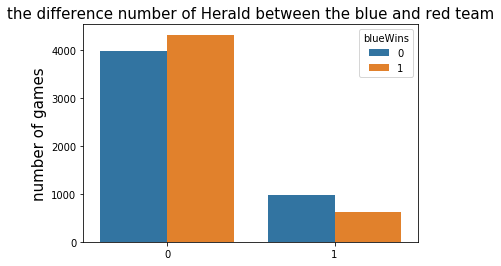

In [8]:
sns.countplot(data['blueHeraldsDiff'], hue = data['blueWins'])
plt.ylabel('number of games', size=15)
plt.title('the difference number of Herald between the blue and red team', size=15)
plt.xlabel('')
plt.show()

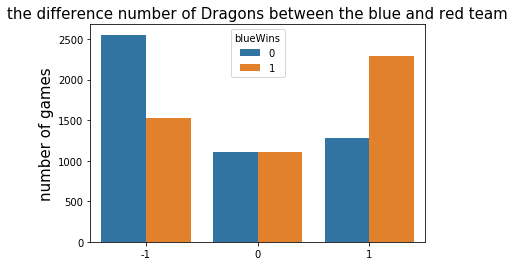

In [9]:
sns.countplot(data['blueDragonsDiff'], hue = data['blueWins'])
plt.ylabel('number of games', size=15)
plt.title('the difference number of Dragons between the blue and red team', size=15)
plt.xlabel('')
plt.show()

In [10]:
len(data[data['blueDragonsDiff'] == -1])

4081

In [11]:
len(data)

9879

In [12]:
len(data[data['blueDragonsDiff'] == 1])/ len(data)

0.3619799574855755

In [13]:
data = data.drop(columns= ['blueEliteMonstersDiff', 'blueHeraldsDiff', 'blueTowersDestroyedDiff' ]) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blueWins                          9879 non-null   int64  
 1   blueFirstBlood                    9879 non-null   int64  
 2   blueKills                         9879 non-null   int64  
 3   blueDeaths                        9879 non-null   int64  
 4   blueGoldDiff                      9879 non-null   int64  
 5   blueExperienceDiff                9879 non-null   int64  
 6   blueWardsPlacedDiff               9879 non-null   int64  
 7   blueWardsDestroyedDiff            9879 non-null   int64  
 8   blueAvgLevelDiff                  9879 non-null   float64
 9   blueAssistsDiff                   9879 non-null   int64  
 10  blueTotalMinionsKilledDiff        9879 non-null   int64  
 11  blueTotalJungleMinionsKilledDiff  9879 non-null   int64  
 12  blueDr

In [14]:
np.random.seed(42)

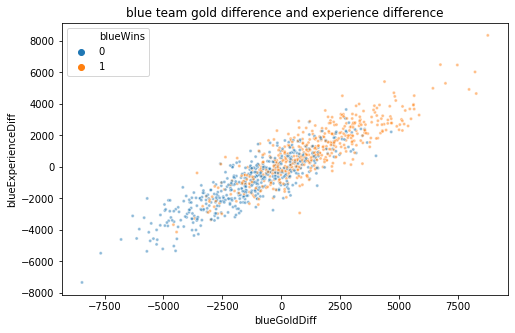

In [15]:
df_sample= data.sample(1000,random_state=42)
plt.figure(figsize=(8,5))
sns.scatterplot(df_sample['blueGoldDiff'], df_sample['blueExperienceDiff'], hue=data['blueWins'], alpha=0.5, s=10)
plt.title('blue team gold difference and experience difference')
plt.show()

In [16]:
corr = data.corr()
corr['blueWins'].sort_values(ascending=False)

blueWins                            1.000000
blueGoldDiff                        0.511119
blueExperienceDiff                  0.489558
blueAvgLevelDiff                    0.452927
blueAssistsDiff                     0.385866
blueKills                           0.337358
blueTotalMinionsKilledDiff          0.309126
blueDragonsDiff                     0.234264
blueFirstBlood                      0.201769
blueTotalJungleMinionsKilledDiff    0.169118
blueWardsDestroyedDiff              0.075205
blueWardsPlacedDiff                 0.016890
blueDeaths                         -0.339297
Name: blueWins, dtype: float64

In [17]:
corr_list = data[data.columns[1:]].apply(lambda x: x.corr(data['blueWins']))
cols = []
for col in corr_list.index:
    if (corr_list[col]>0.2 or corr_list[col]<-0.2):
        cols.append(col)
cols

['blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueAvgLevelDiff',
 'blueAssistsDiff',
 'blueTotalMinionsKilledDiff',
 'blueDragonsDiff']

In [18]:
from sklearn.model_selection import train_test_split

y = data['blueWins']
X = data.loc[:, data.columns != 'blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

test_df = pd.concat([X_test, y_test], axis=1) 
train_df = pd.concat([X_train, y_train], axis=1)




train_df.to_csv('train.csv', index = False) 
test_df.to_csv('test.csv', index = False)

In [19]:
train_data = pd.read_csv("../datasets/train.csv")
test_data = pd.read_csv("../datasets/test.csv")

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6915 entries, 0 to 6914
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blueFirstBlood                    6915 non-null   int64  
 1   blueKills                         6915 non-null   int64  
 2   blueDeaths                        6915 non-null   int64  
 3   blueGoldDiff                      6915 non-null   int64  
 4   blueExperienceDiff                6915 non-null   int64  
 5   blueWardsPlacedDiff               6915 non-null   int64  
 6   blueWardsDestroyedDiff            6915 non-null   int64  
 7   blueAvgLevelDiff                  6915 non-null   float64
 8   blueAssistsDiff                   6915 non-null   int64  
 9   blueTotalMinionsKilledDiff        6915 non-null   int64  
 10  blueTotalJungleMinionsKilledDiff  6915 non-null   int64  
 11  blueDragonsDiff                   6915 non-null   int64  
 12  blueWi

In [21]:
X = data.iloc[:, 1:]
y = data['blueWins']

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blueFirstBlood                    9879 non-null   int64  
 1   blueKills                         9879 non-null   int64  
 2   blueDeaths                        9879 non-null   int64  
 3   blueGoldDiff                      9879 non-null   int64  
 4   blueExperienceDiff                9879 non-null   int64  
 5   blueWardsPlacedDiff               9879 non-null   int64  
 6   blueWardsDestroyedDiff            9879 non-null   int64  
 7   blueAvgLevelDiff                  9879 non-null   float64
 8   blueAssistsDiff                   9879 non-null   int64  
 9   blueTotalMinionsKilledDiff        9879 non-null   int64  
 10  blueTotalJungleMinionsKilledDiff  9879 non-null   int64  
 11  blueDragonsDiff                   9879 non-null   int64  
dtypes: flo

In [23]:
train_data

,blueFirstBlood,blueKills,blueDeaths,blueGoldDiff,blueExperienceDiff,blueWardsPlacedDiff,blueWardsDestroyedDiff,blueAvgLevelDiff,blueAssistsDiff,blueTotalMinionsKilledDiff,blueTotalJungleMinionsKilledDiff,blueDragonsDiff,blueWins
0,1,11,9,1433,508,-11,5,0.2,2,21,-8,-1,1
1,0,6,4,533,1187,-2,0,0.4,1,-1,-21,1,0
2,0,3,4,3156,3919,4,-1,1.2,-3,59,28,1,1
3,0,2,9,-3084,-1719,-6,-2,-0.6,-7,-30,-4,-1,0
4,0,3,7,-2825,-2497,-7,-1,-0.4,-5,-14,-21,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6910,1,11,9,2249,2480,5,2,0.4,5,12,8,1,1
6911,1,6,8,-407,-1257,-35,-1,-0.4,-2,-20,13,-1,1
6912,0,11,5,2840,1792,8,1,0.2,2,-1,-8,-1,1
6913,1,4,5,-527,-208,-46,2,0.0,-4,25,-31,-1,0


In [24]:
X_train = train_data.iloc[:, :-1]
y_train = train_data['blueWins']
X_test = test_data.iloc[:, :-1]
y_test = test_data['blueWins']

In [25]:
#normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [26]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', solver = 'saga')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))

print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.7360809833694866
Test accuracy: 0.7338056680161943


In [28]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
class SBS():
    def __init__(self, estimator, k_features,
                 scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)
    
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
        
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

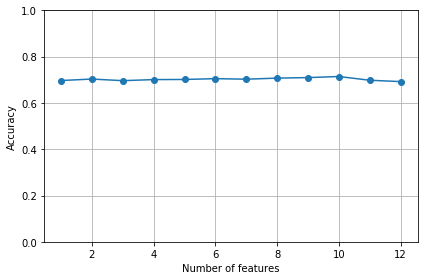

In [30]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [31]:
k3 = list(sbs.subsets_[6])
print(X_train.columns[0:][k3])

Index(['blueKills', 'blueDeaths', 'blueGoldDiff', 'blueExperienceDiff',
       'blueWardsPlacedDiff', 'blueWardsDestroyedDiff'],
      dtype='object')


In [32]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.7768618944323934
Test accuracy: 0.6774628879892037


In [33]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:',knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:',knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.7838033261026753
Test accuracy: 0.6821862348178138


 1) blueGoldDiff                   0.205841
 2) blueExperienceDiff             0.169935
 3) blueTotalMinionsKilledDiff     0.093414
 4) blueTotalJungleMinionsKilledDiff 0.083268
 5) blueAssistsDiff                0.080680
 6) blueWardsPlacedDiff            0.080579
 7) blueAvgLevelDiff               0.073836
 8) blueDeaths                     0.058961
 9) blueKills                      0.058046
10) blueWardsDestroyedDiff         0.054007
11) blueDragonsDiff                0.026809
12) blueFirstBlood                 0.014625


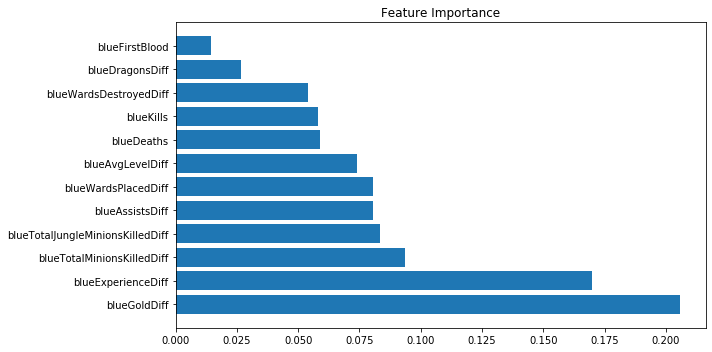

In [34]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = data.columns[1:]
forest = RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]): print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))

plt.figure(figsize= (10,5))
plt.title('Feature Importance')

plt.barh(range(X_train.shape[1]), importances[indices], align='center')

plt.yticks(range(X_train.shape[1]), feat_labels[indices], rotation= 0)

plt.ylim([-1, X_train.shape[1]])

plt.tight_layout()
plt.show()

In [35]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.01, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold', 'criterion:', X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))

Number of features that meet this threshold criterion: 12
 1) blueGoldDiff                   0.205841
 2) blueExperienceDiff             0.169935
 3) blueTotalMinionsKilledDiff     0.093414
 4) blueTotalJungleMinionsKilledDiff 0.083268
 5) blueAssistsDiff                0.080680
 6) blueWardsPlacedDiff            0.080579
 7) blueAvgLevelDiff               0.073836
 8) blueDeaths                     0.058961
 9) blueKills                      0.058046
10) blueWardsDestroyedDiff         0.054007
11) blueDragonsDiff                0.026809
12) blueFirstBlood                 0.014625


In [36]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

In [37]:
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.732


In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr, X=X_train,  y= y_train, cv=10)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy scores: [0.72109827 0.73554913 0.72687861 0.71820809 0.73988439 0.72937771
 0.76266281 0.72937771 0.72937771 0.73806078]
CV accuracy: 0.733 +/- 0.012


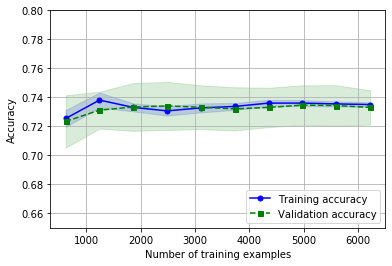

In [39]:
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state=42, solver='lbfgs',max_iter=10000))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr,X=X_train,y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')


plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')

plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.65, 0.8])
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np

clf1 = LogisticRegression()

clf2 = DecisionTreeClassifier()

clf3 = KNeighborsClassifier()


pipe1 = Pipeline([['sc', StandardScaler()],['clf', clf1]])

pipe3 = Pipeline([['sc', StandardScaler()],['clf', clf3]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"% (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.81 (+/- 0.01) [Logistic regression]
ROC AUC: 0.64 (+/- 0.02) [Decision tree]
ROC AUC: 0.73 (+/- 0.02) [KNN]


In [49]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_std,y_train)
pred1=lr.predict(X_test_std)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1480
           1       0.73      0.73      0.73      1484

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964



In [50]:
from  sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
pred2 = model.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1480
           1       0.73      0.72      0.72      1484

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred3 = dt.predict(X_test)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1480
           1       0.65      0.64      0.65      1484

    accuracy                           0.65      2964
   macro avg       0.65      0.65      0.65      2964
weighted avg       0.65      0.65      0.65      2964

